### Neural network for recognizing handwritten digits

In [1]:
# Import necessary libraries
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint   
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
numpy.random.seed(23)

Using TensorFlow backend.


In [2]:
# load data and make a training and testing split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshaping to a format suitable to keras (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

# Normalize the input features
X_train/=255
X_test/=255

# Encode the classes to numbers (one-hot encode)
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

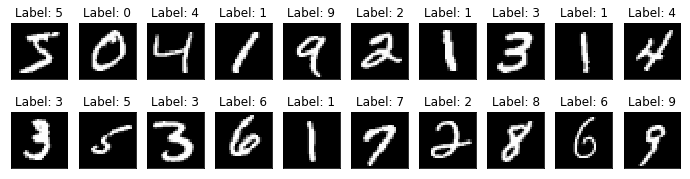

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

# Visualize some of our training data
plt.figure(figsize=(12, 3))
x, y = 10, 4
for i in range(20):  
    plt.subplot(2, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('Label: %s' % int(sum(y_train[i] * [0,1,2,3,4,5,6,7,8,9])))
    plt.imshow(X_train[i].reshape((28,28)), cmap='gray', interpolation='nearest')
plt.show()

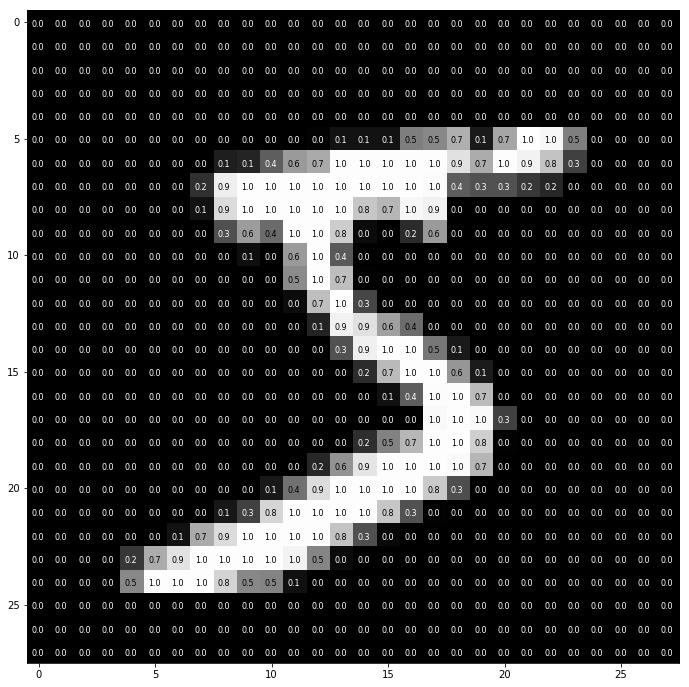

In [112]:
# Visualize composition of an image
plt.figure(figsize=(12, 12))
plt.imshow(X_train[0].reshape((28,28)), cmap='gray')
for i in range(28):
    for j in range(28):
        color = 'white' if X_train[0][j,i] < .4 else 'black' 
        plt.annotate('{:.1f}'.format(float(X_train[0][j,i])), (i-.3, j+.2), color=color, size=8)
plt.show()

In [119]:
# Define our convolutional neural network
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          callbacks = [checkpointer], epochs=5, batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
58430/60000 [============================>.] - ETA: 0s - loss: 0.1245 - acc: 0.9609

In [117]:
# Final evaluation of the model
model.load_weights('mnist.model.weights.best.hdf5')
metrics = model.evaluate(X_test, y_test, verbose=1)

print("Metrics (loss & accuracy): %s" % metrics)

10000/10000 [==============================] - 1s 54us/step
Metrics (loss & accuracy): [0.028055307366994384, 0.99119999999999997]
